# Exercise 2.1
### Evaluation of an integral $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ using uniform sampling and importance sampling

If we have an integral of the type: $I = ∫dxg(x)p(x)$, where p(x) has the properties of a probability distribution, we can compute it:



*   With **uniform sampling** by sampling $r_i$ from $p(x)$ end evaluating $I ≃ \frac{1}{N}\sum_{i = 1}^N g(r_i)$
*   with **importance sampling** we extracr instead $r_i$ pdf $d(x)$ similar to the integrand, so that $I = ∫dx[\frac{g(x)p(x)}{d(x)}]d(x)$

As my choice for $d(x)$ I:



*   Taylor-expanded g(x) to the second order
*   Changed the result so that it was positive on the considered domain (as a pdf should be)
*   Normalized the resulting function imposing its integral equals to 1

Therefore obtaining:

$d(x) = \frac{3}{2} - \frac{3}{2}x^2$


/tmp/ipython-input-2-3241453838.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("mean.dat", delim_whitespace=True, header=None, names=["mean_US", "error_mean_US"])
/tmp/ipython-input-2-3241453838.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv("importance.dat", delim_whitespace=True, header=None, names=["mean_IS", "error_mean_IS"])


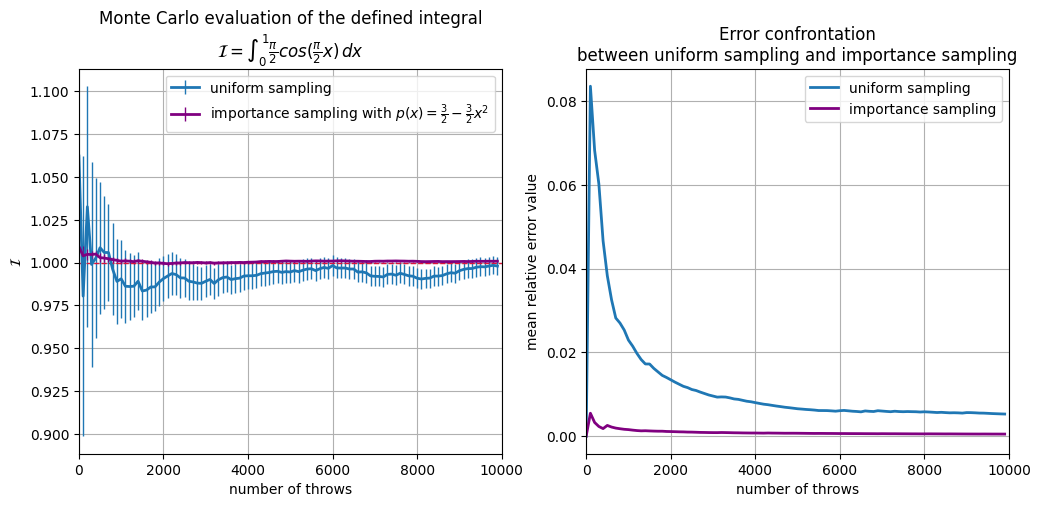

,mean_US,error_mean_US,mean_IS,error_mean_IS
0,1.062260,0.000000,1.00944,0.000000
1,0.980392,0.081873,1.00393,0.005506
2,1.032600,0.070430,1.00480,0.003297
3,0.998894,0.060137,1.00469,0.002334
4,1.002670,0.046735,1.00496,0.001828
...,...,...,...,...
95,0.997581,0.005449,1.00073,0.000523
96,0.997496,0.005393,1.00073,0.000518
97,0.997946,0.005356,1.00079,0.000517
98,0.998376,0.005319,1.00075,0.000513


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 100
M = 10**4
L = int(M/N)

#input data:
df = pd.read_csv("mean.dat", delim_whitespace=True, header=None, names=["mean_US", "error_mean_US"])
df2 = pd.read_csv("importance.dat", delim_whitespace=True, header=None, names=["mean_IS", "error_mean_IS"])
df = pd.concat([df, df2], axis=1)

x = np.arange(N)
x*=L

#integration plot
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].errorbar(x,df['mean_US'],yerr=df['error_mean_US'], label = 'uniform sampling', linewidth=2, elinewidth=1)
ax[0].errorbar(x,df2['mean_IS'],yerr=df2['error_mean_IS'], color = 'purple', label = r'importance sampling with $p(x) = \frac{3}{2} - \frac{3}{2}x^2$', linewidth=2, elinewidth=1)
ax[0].set(xlabel = 'number of throws', ylabel = r'$\mathcal{I}$', title = r'Monte Carlo evaluation of the defined integral'+'\n'+r'$\mathcal{I} = \int_{0}^{1} \frac{\pi}{2} cos(\frac{\pi}{2} x) \,dx$')
ax[0].set_xlim(0,10000)
ax[0].axhline(1, color='crimson', linestyle = '--', linewidth = 1)
ax[0].grid(True)

ax[1].plot(x, df['error_mean_US']/df['mean_US'], linewidth=2, label = 'uniform sampling')
ax[1].plot(x, df['error_mean_IS']/df['mean_IS'], color = 'purple', linewidth=2, label = 'importance sampling')
ax[1].set(xlabel = 'number of throws', ylabel = r'mean relative error value', title = r'Error confrontation'+'\n'+'between uniform sampling and importance sampling', label = 'importance sampling')
ax[1].set_xlim(0,10000)
ax[1].grid(True)

ax[1].legend()
ax[0].legend()

plt.show()
plt.close()

df

Importance sampling reaches convergence faster, and with a much greater precision!

# Exercise 2.2

### simulation of Random Walks

We simulate two random walks in the 3D space. One is constrained to a cubic lattice of lattice constant 1, the other is free to roam all 3D space with steps of unitary length

/tmp/ipython-input-3-2093321818.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("RW_simulation.dat", delim_whitespace=True, header=None, names=["X_DRW", "Y_DRW", "Z_DRW", "X_CRW", "Y_CRW", "Z_CRW"])


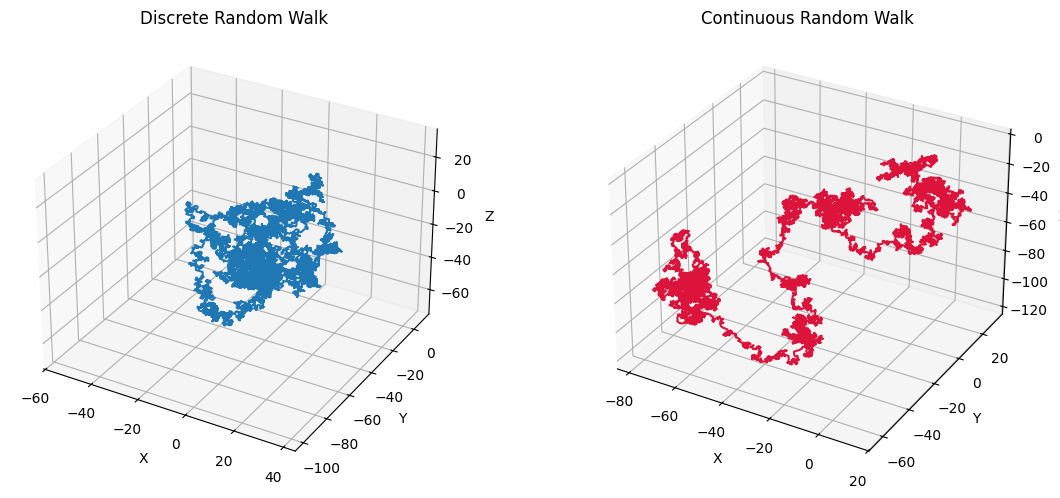

In [3]:
df = pd.read_csv("RW_simulation.dat", delim_whitespace=True, header=None, names=["X_DRW", "Y_DRW", "Z_DRW", "X_CRW", "Y_CRW", "Z_CRW"])

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot(df['X_DRW'], df['Y_DRW'], df['Z_DRW'], label="Discrete RW")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Discrete Random Walk")

ax2.plot(df['X_CRW'], df['Y_CRW'], df['Z_CRW'], color='crimson', label="Continuous RW")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.set_title("Continuous Random Walk")

plt.tight_layout()
plt.show()

weùùWe can see that both the RWs explore roughly the same distance from the origin, but the "continuous" one has more possible states to evolve to, resulting in a less cohesive outlook.


That both reach the same mean displacement is visible in the graphs below, that confirm a diffusive behaviour with a fit of the curve $k \sqrt N$

/tmp/ipython-input-4-2358627247.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None,
/tmp/ipython-input-4-2358627247.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_DRW, pcov_DRW = curve_fit(fit_func, steps, df["sqrt_r2_DRW"], sigma=df["err_DRW"], absolute_sigma=True)
/tmp/ipython-input-4-2358627247.py:22: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_CRW, pcov_CRW = curve_fit(fit_func, steps, df["sqrt_r2_CRW"], sigma=df["err_CRW"], absolute_sigma=True)


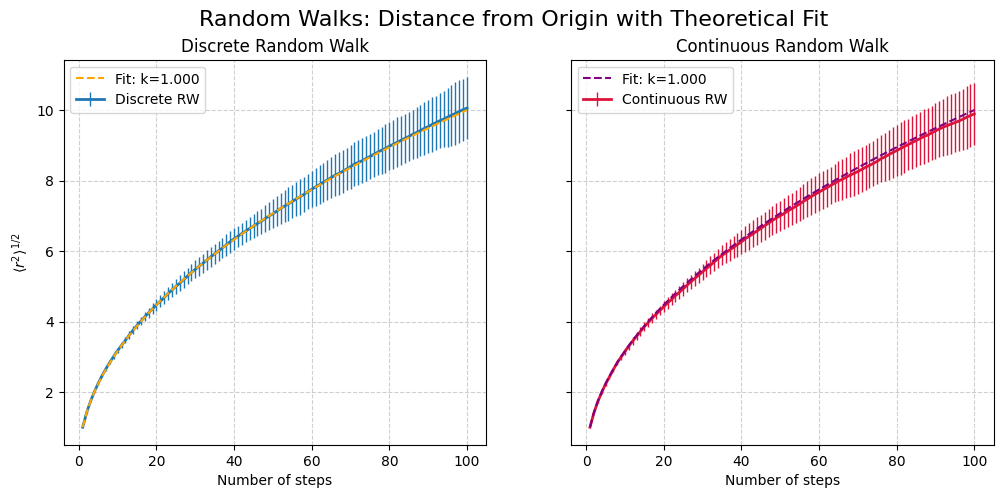

In [4]:
from scipy.optimize import curve_fit

# Funzione teorica di fit: f(N) = k * sqrt(N)
def fit_func(N, k):
    return k * np.sqrt(N)

# Caricamento dati
filename = "RW_props.dat"
df = pd.read_csv(filename, delim_whitespace=True, header=None,
                 names=["sqrt_r2_DRW", "err_DRW", "sqrt_r2_CRW", "err_CRW"])

n_steps = len(df)
steps = np.arange(1, n_steps + 1)

# Fit per DRW
popt_DRW, pcov_DRW = curve_fit(fit_func, steps, df["sqrt_r2_DRW"], sigma=df["err_DRW"], absolute_sigma=True)
k_DRW = popt_DRW[0]
err_k_DRW = np.sqrt(pcov_DRW[0][0])
fit_DRW = fit_func(steps, k_DRW)

# Fit per CRW
popt_CRW, pcov_CRW = curve_fit(fit_func, steps, df["sqrt_r2_CRW"], sigma=df["err_CRW"], absolute_sigma=True)
k_CRW = popt_CRW[0]
err_k_CRW = np.sqrt(pcov_CRW[0][0])
fit_CRW = fit_func(steps, k_CRW)

# Plot in due subplot
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Subplot DRW
ax[0].errorbar(steps, df["sqrt_r2_DRW"], yerr=df["err_DRW"],
               label="Discrete RW", linewidth=2, elinewidth=1)
ax[0].plot(steps, fit_DRW, color='orange', linestyle = '--',zorder = 100, label=f'Fit: k={k_DRW:.3f}')
ax[0].set(title='Discrete Random Walk',
          xlabel='Number of steps',
          ylabel=r'$\langle r^2 \rangle^{1/2}$')
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].legend()

# Subplot CRW
ax[1].errorbar(steps, df["sqrt_r2_CRW"], yerr=df["err_CRW"],
               label="Continuous RW", color='crimson', linewidth=2, elinewidth=1)
ax[1].plot(steps, fit_CRW, color='purple', linestyle = '--',zorder = 100, label=f'Fit: k={k_CRW:.3f}')
ax[1].set(title='Continuous Random Walk',
          xlabel='Number of steps')
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].legend()

plt.suptitle("Random Walks: Distance from Origin with Theoretical Fit", fontsize=16)
plt.show()
